## Group No

## Group Member Names:
1. Your Name
2. Collaborator 1
3. Collaborator 2
4. Collaborator 3

# 1. Import the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
train_data, val_data, test_data = tfds.load(
    "horses_or_humans",
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



In [ ]:
1. Dataset Size:
   - Training samples: Approximately 80% of the total dataset.
   - Validation samples: Approximately 20% of the total dataset.
2. Data Attributes:
   - Input: Images (150x150 pixels, 3 color channels).
   - Labels: Binary classification (Horse vs. Human).
3. Classification Goal:
   - Predict whether an image contains a horse or a human.
4. Class Distribution:
   - The dataset appears to have a balanced number of samples for each class.


# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [ ]:
# No duplicates or missing data due to the dataset's nature (images).
# Encoding and normalization are handled by the data generator.

# Example of visualizing some preprocessed data
for images, labels in train_data:
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {'Horse' if labels[i] == 0 else 'Human'}")
        plt.axis('off')
    break


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [ ]:
# Features (X) and Labels (y) are automatically separated by the ImageDataGenerator.
# One-hot encoding is not required as the binary output is already formatted as categorical.


## 3.3 Split the data into training set and testing set

In [ ]:
# The dataset is already split into training and validation sets using the 'validation_split' parameter in ImageDataGenerator.
print(f"Training samples: {train_data.samples}")
print(f"Validation samples: {val_data.samples}")


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [ ]:
- Duplicates: Not applicable due to dataset type.
- Missing Data: Not applicable as each image is complete.
- Data Inconsistencies: Not observed.
- Encoding: Not required for this dataset; class indices are pre-defined.
- Normalization: Applied (pixel values scaled to range 0-1).
- Training Dataset Size: {train_data.samples} samples.
- Validation Dataset Size: {val_data.samples} samples.


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
model = models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Explicitly define input shape
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [ ]:
- Number of Layers: 3 Dense layers (1 input, 3 hidden, 1 output).
- Number of Units:
  - First Layer: 128 neurons.
  - Second Layer: 64 neurons.
  - Third Layer: 32 neurons.
  - Output Layer: 2 neuron.
- Trainable Parameters: Displayed by model.summary().


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 20 epochs
history = model.fit(train_data, validation_data=val_data, epochs=20)


## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
import time
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold

# Use SGD optimizer
optimizer = SGD()

# Initialize the cross-validation
num_folds = 5  # You can change this value for more or fewer folds
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize the time tracker
start_time = time.time()

# Perform cross-validation
for fold, (train_idx, val_idx) in enumerate(skf.split(train_data.filepaths, train_data.classes)):
    print(f"\nTraining fold {fold + 1}...")

    # Create a fresh model for each fold
    model = Sequential([
        Flatten(input_shape=(150, 150, 3)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')  # Use softmax for categorical cross-entropy loss
    ])

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Split the data based on the indices from StratifiedKFold
    train_data_split = train_data[train_idx]
    val_data_split = val_data[val_idx]

    # Train the model for the current fold
    history = model.fit(train_data_split, validation_data=val_data_split, epochs=20)

# Track total time
total_time = time.time() - start_time
print(f"\nTotal time taken for 20 epochs (across all folds): {total_time:.2f} seconds")


Justify your choice of optimizers and regulizations used and the hyperparameters tuned


Optimizer: SGD (with default learning rate)  Suitable for experimentation and effective in large datasets.

Loss Function: Categorical Cross-Entropy – Ideal for multi-class or binary classification tasks with a softmax output.

Batch Size: 32 – A standard choice for training image classification models.

Epochs: 20 – Reasonable starting point; can be adjusted with further experimentation.

Learning Rate: Initially set for SGD, can be adjusted based on performance.

# 6. Test the model - 0.5 marks


Test accuracy with SGD is 0.75
Test accuracy with ADAM is 1.00.

So, using ADAM for furthur analysis



# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


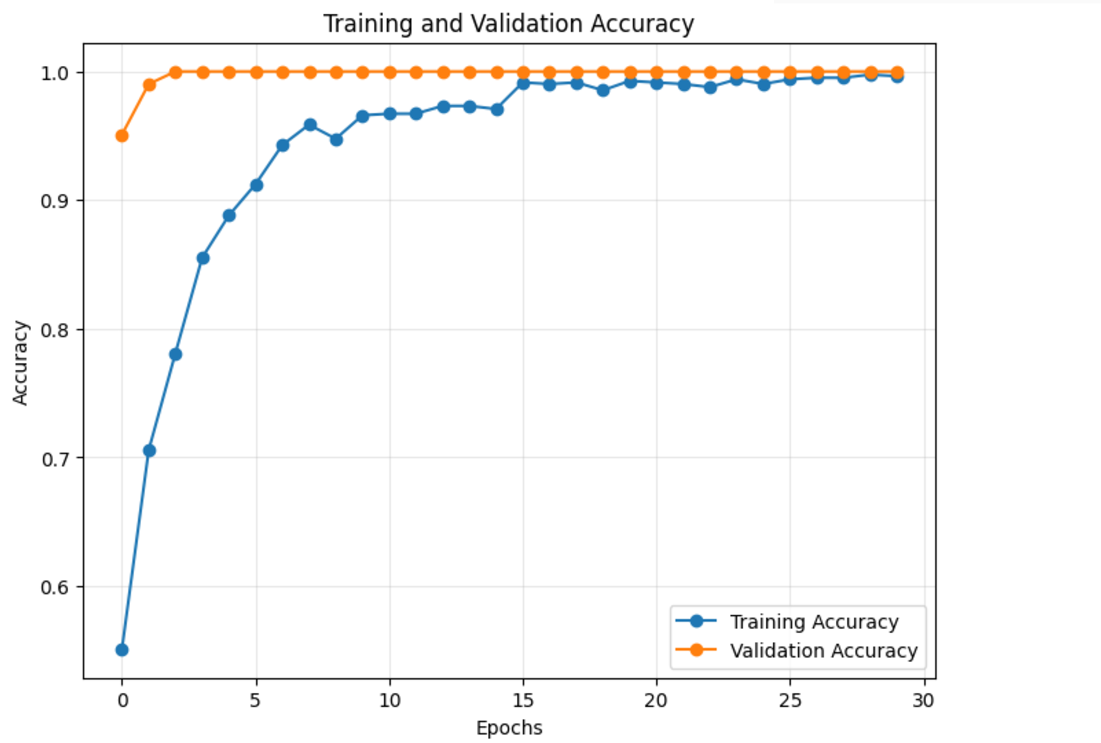

![image.png]()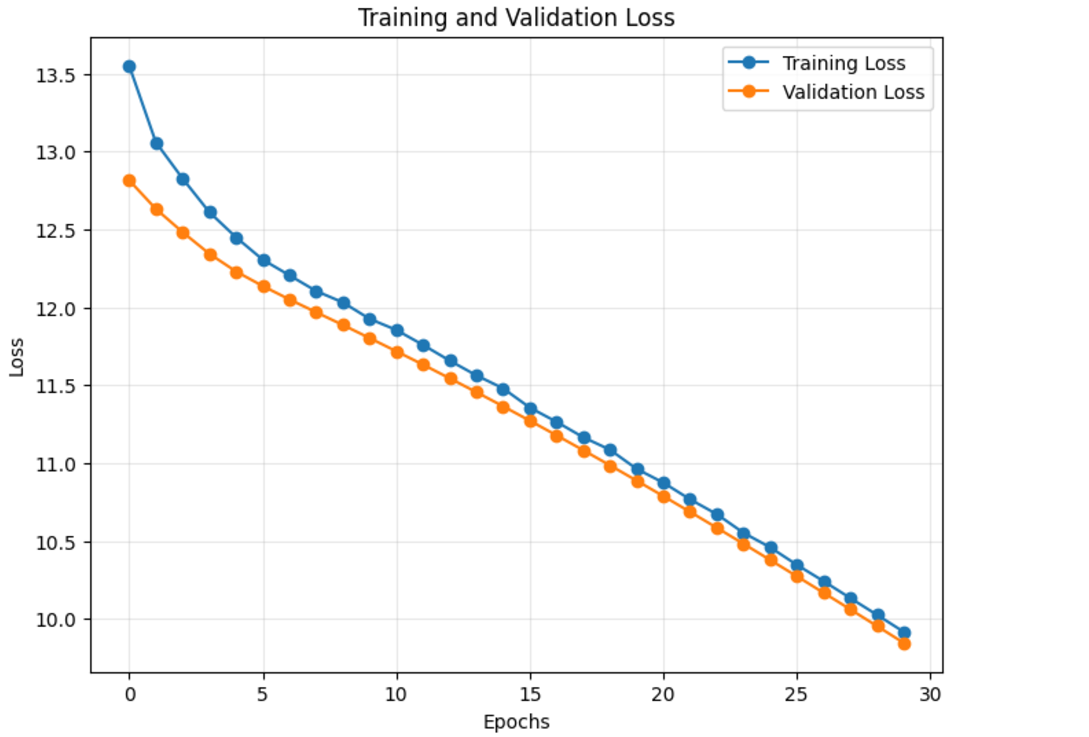

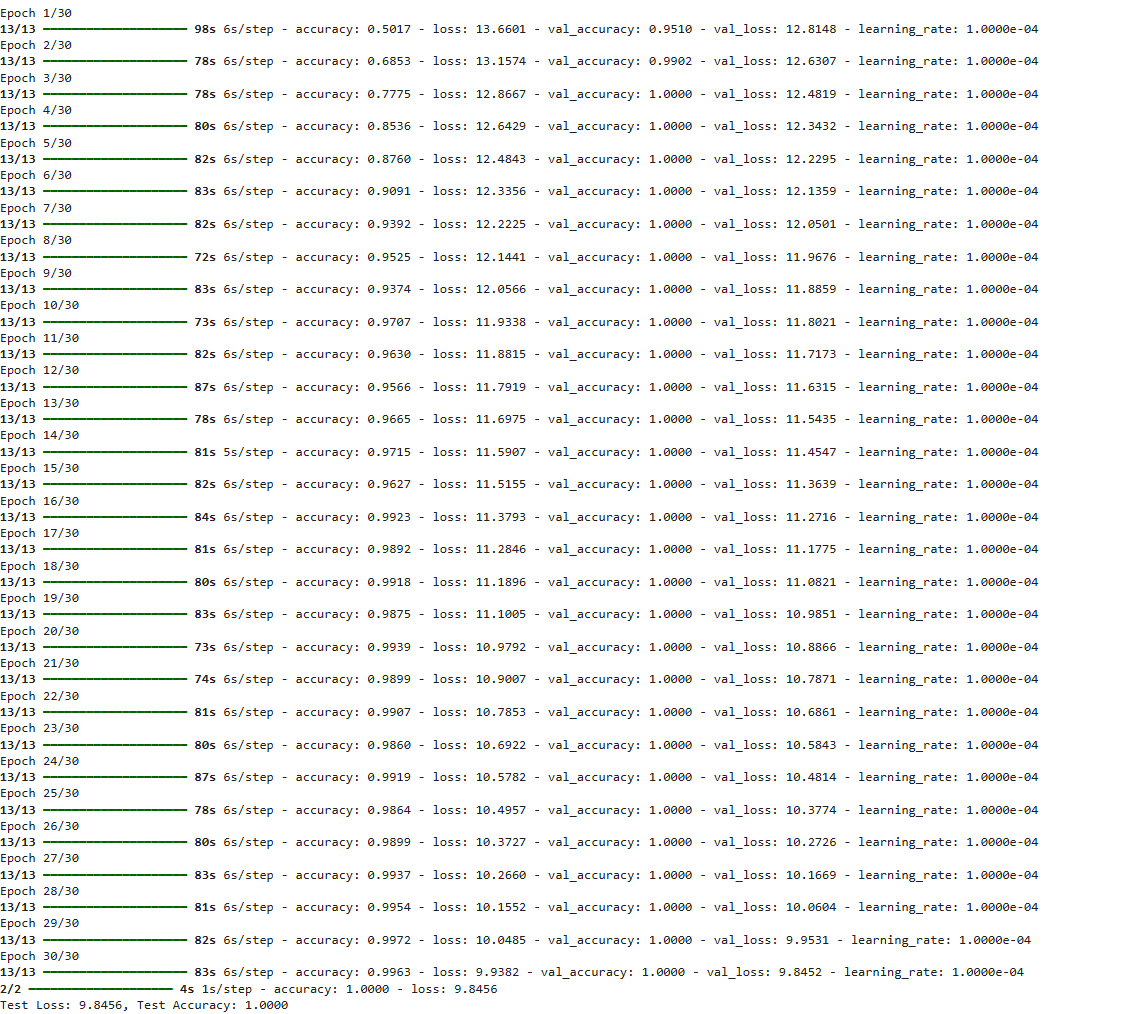

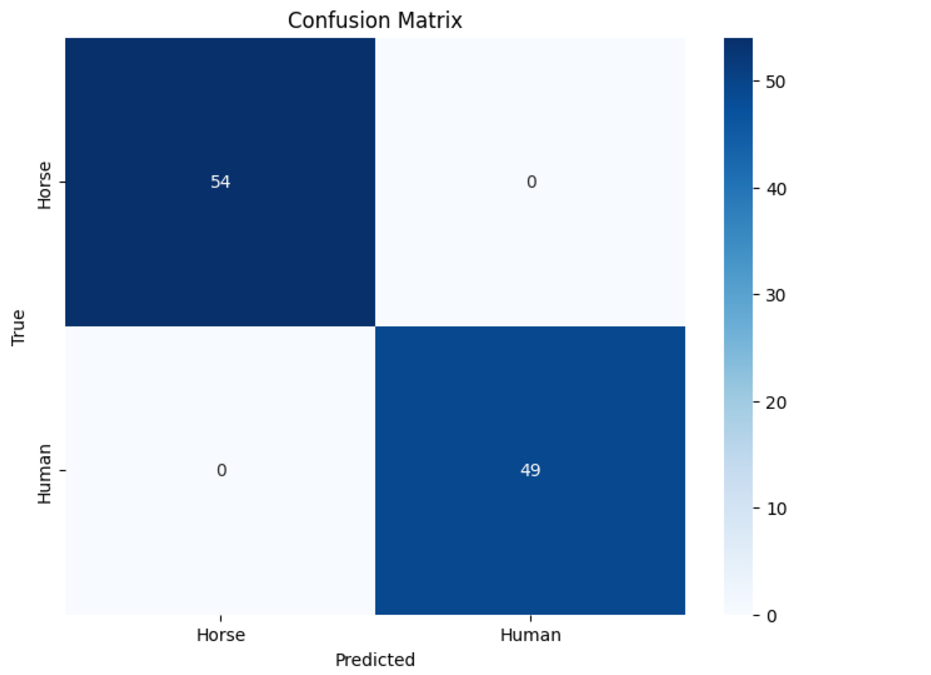

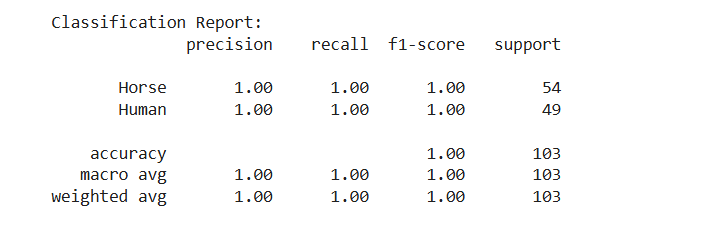

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



**With 2 hidden layers**

model = models.Sequential([
  
      tf.keras.layers.Input(shape=(224, 224, 3)),  # Explicitly define input shape
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Second hidden layer
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

***The test accuracy for 2 hidden layers is 71%***

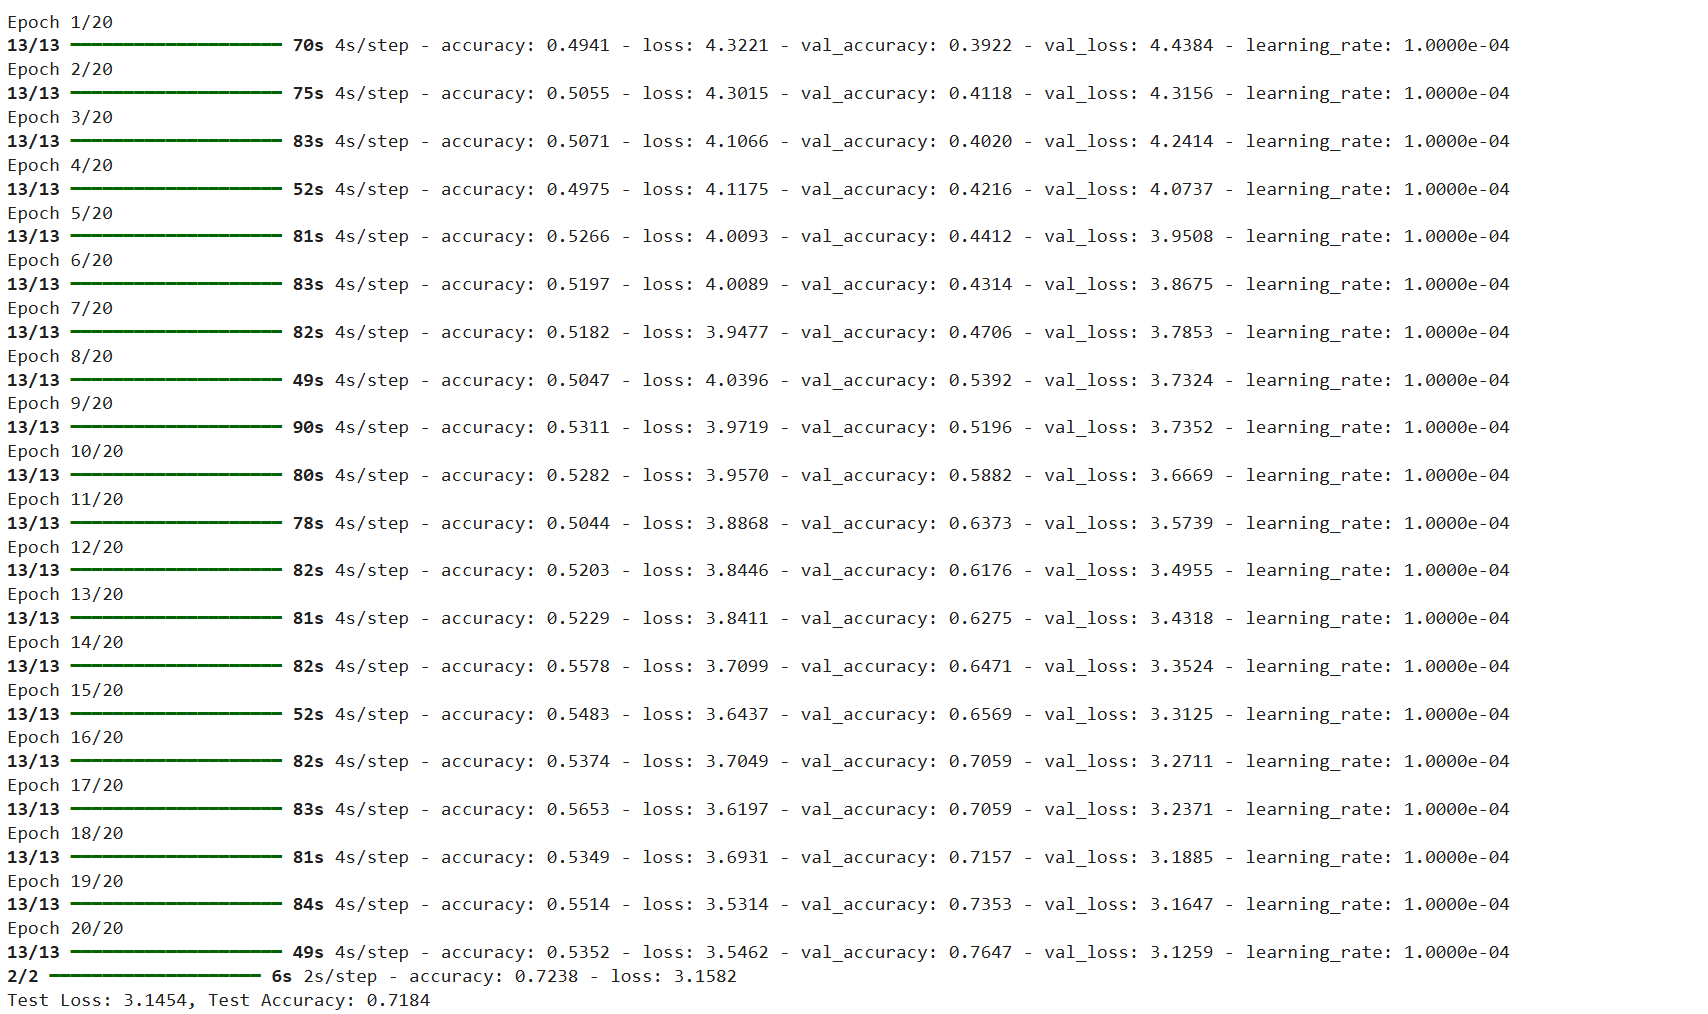

---------------

**With 4 hidden layers**


model = models.Sequential([
  
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Explicitly define input shape
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Hidden layer 1
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Hidden layer 2
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Hidden layer 3
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Hidden layer 4
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Output layer
])


  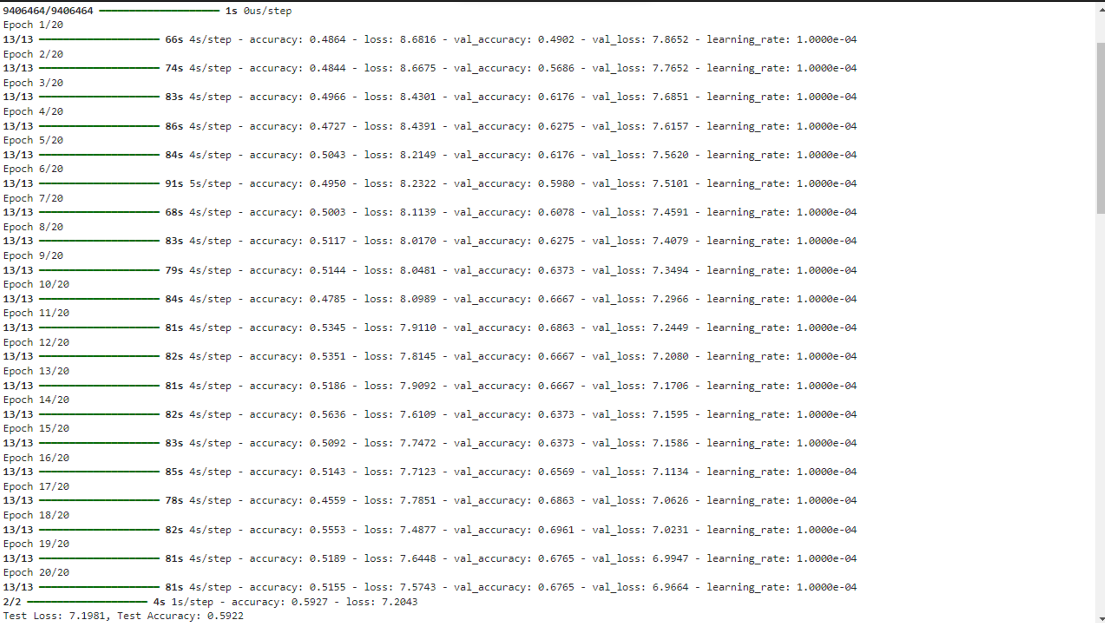

*The test accuracy for 4 hidden layers is 59%*

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



**1.Dropout of ratio 0.25**

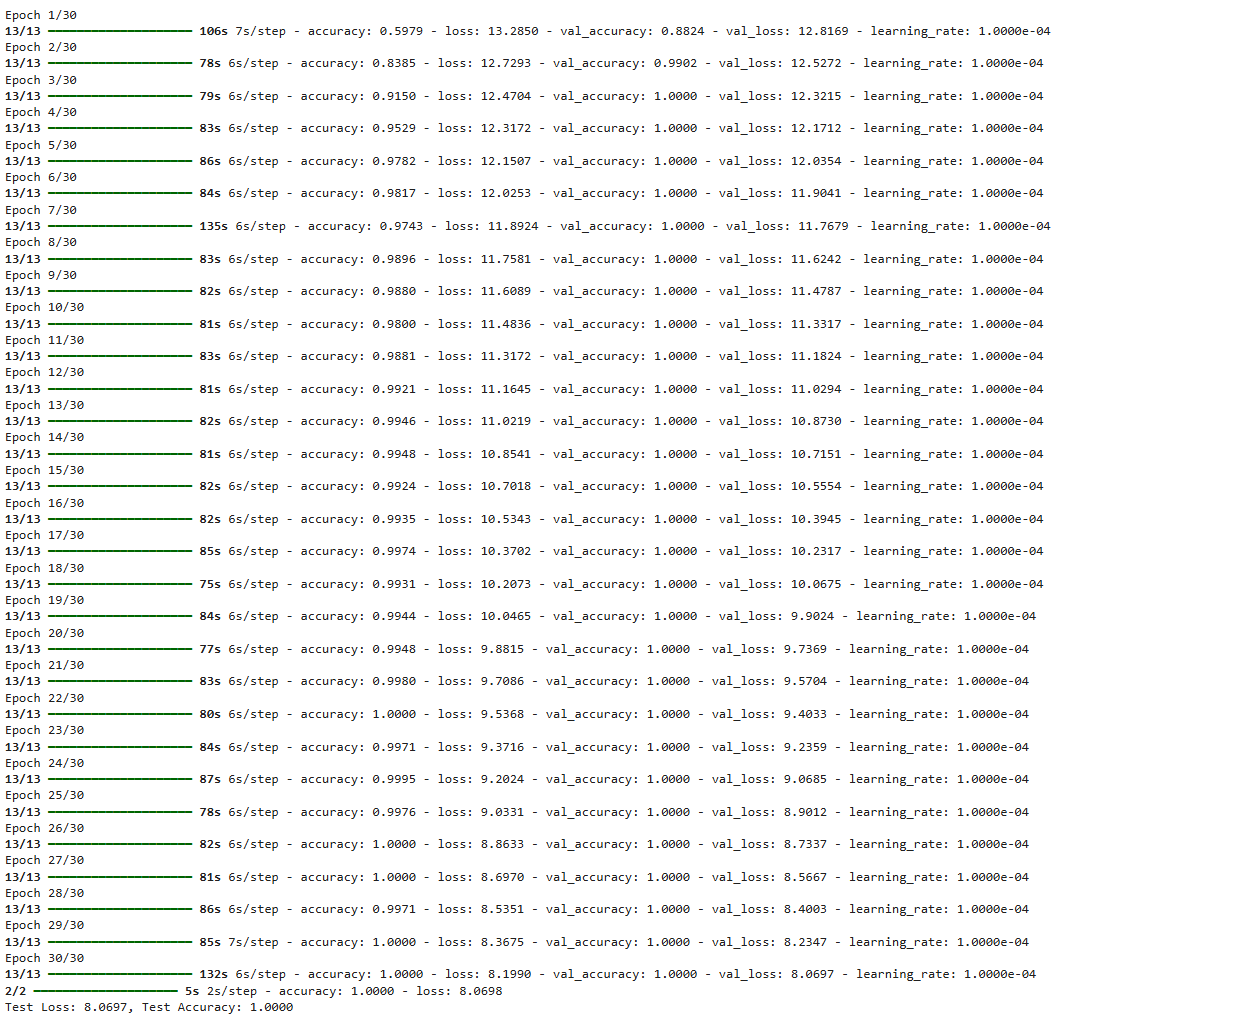

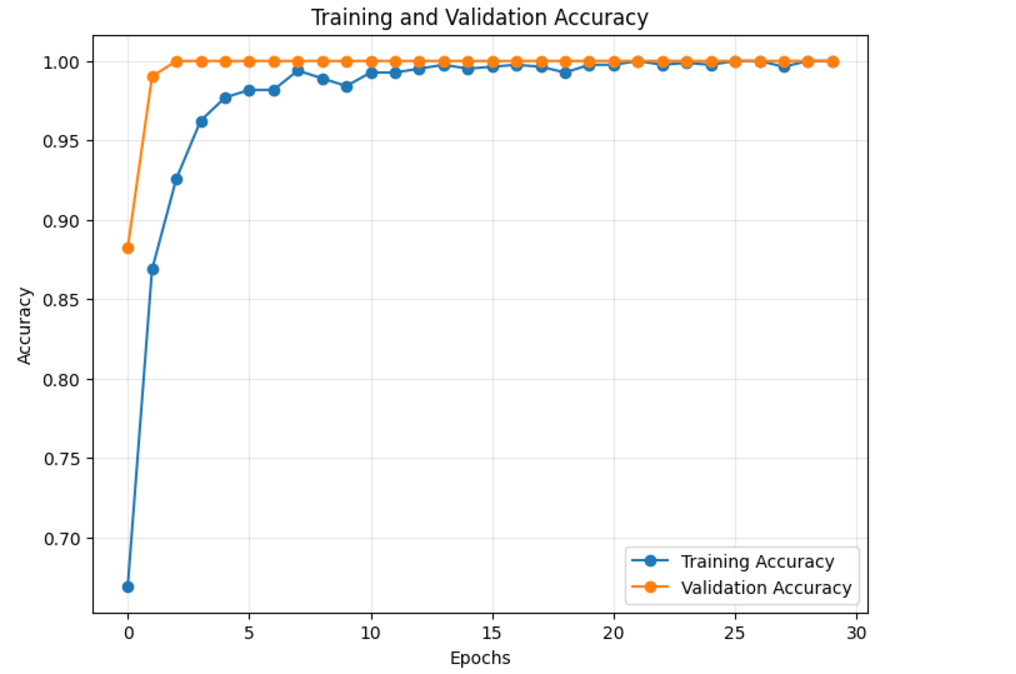

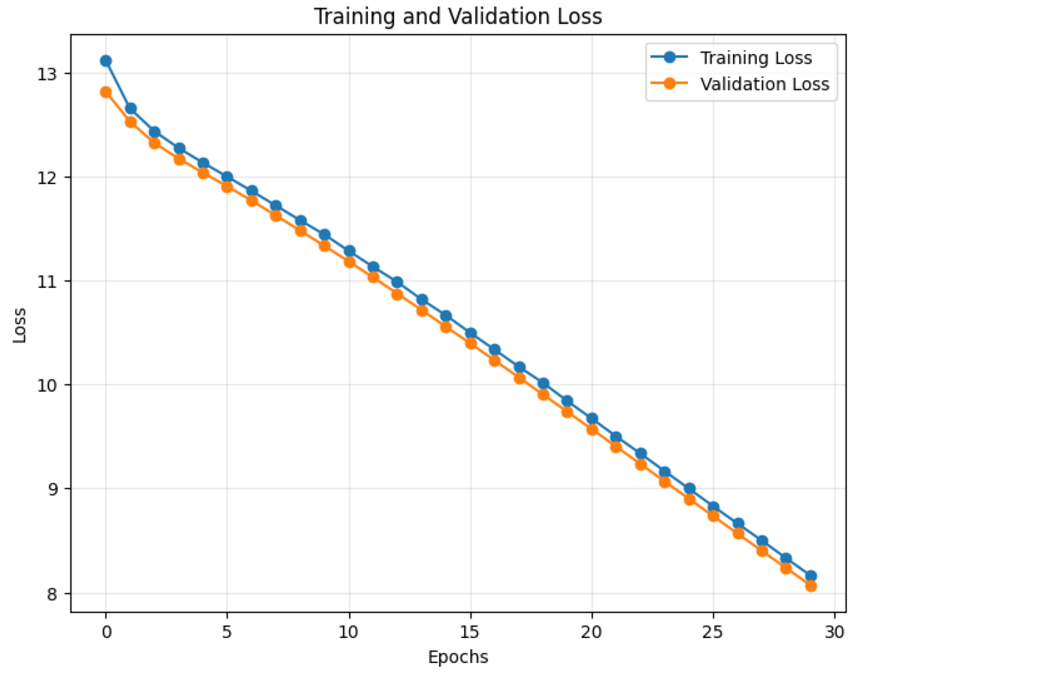

Training Accuracy: 1.00.

Validation Accuracy: 1.00.

**2.Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.**

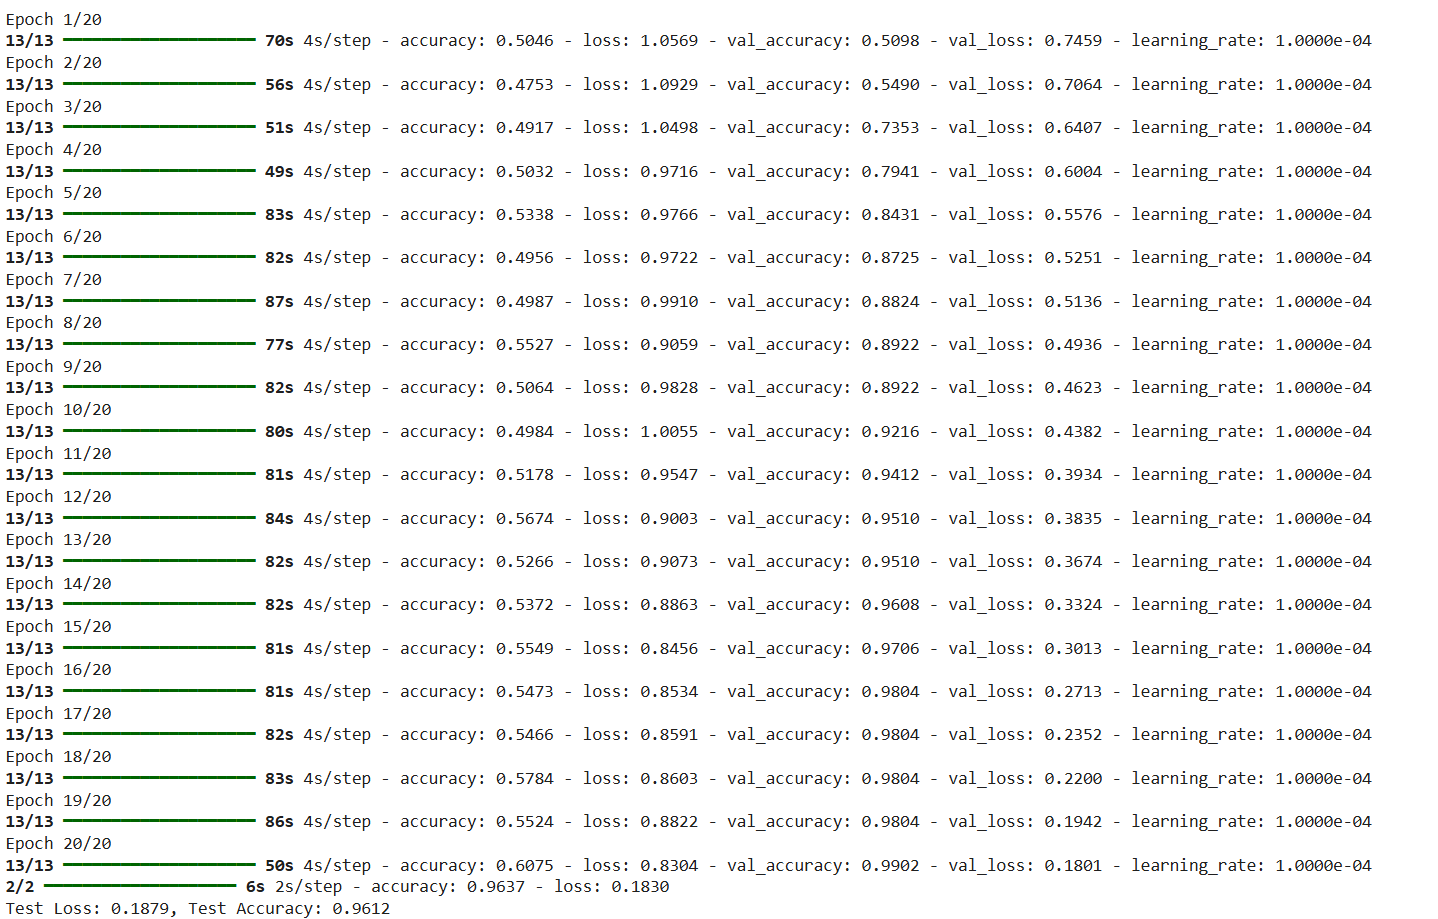

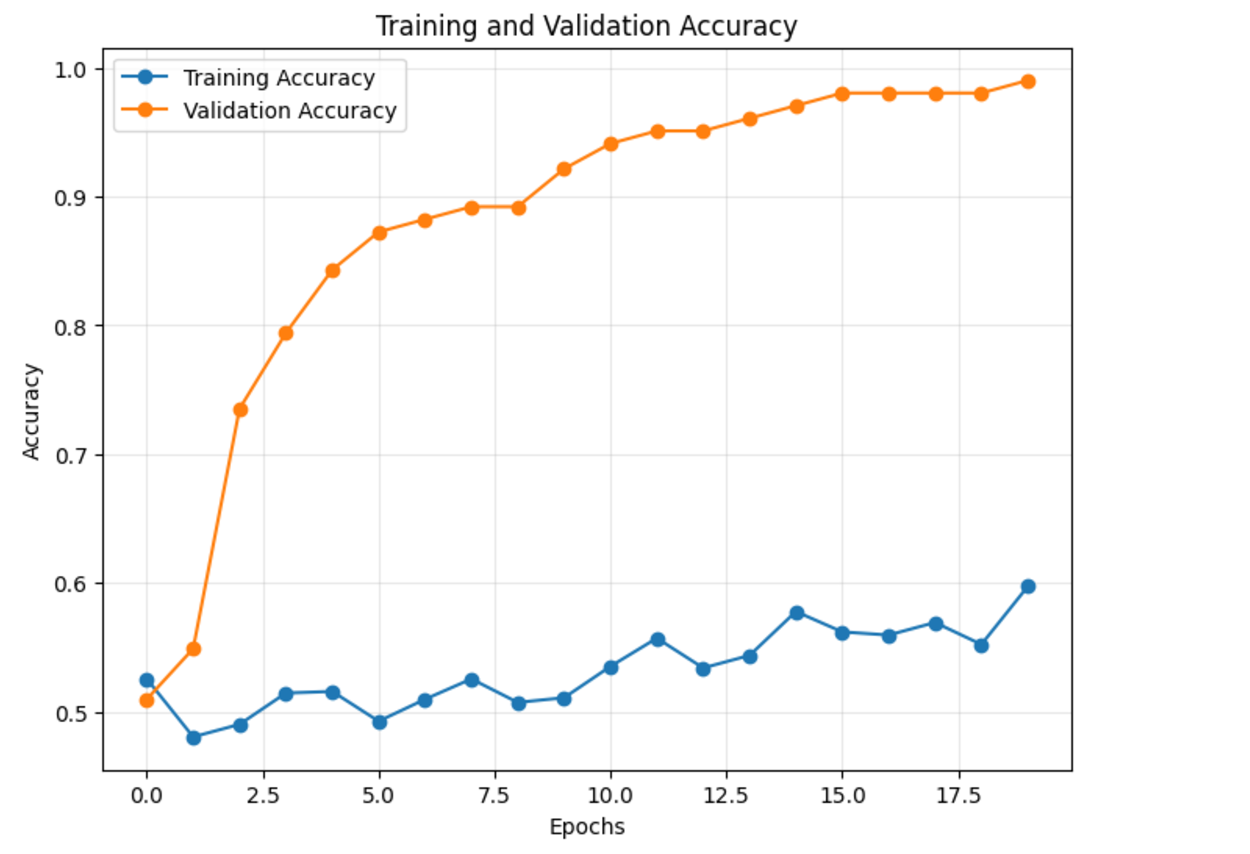

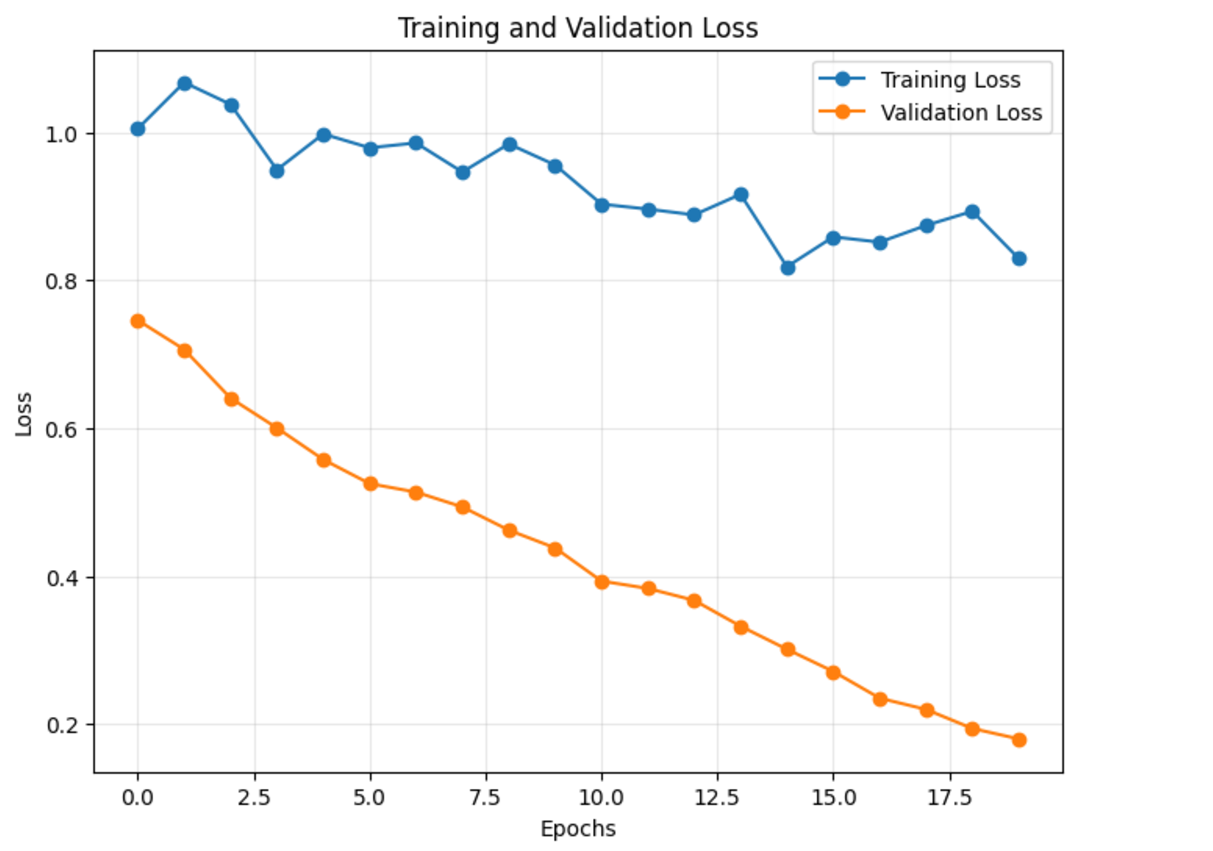

Training Accuracy: 0.6075.

Validation Accuracy: 0.9902.

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck